# Notebook 02 — Cointegration Validation for Selected Pairs

This notebook validates cointegration properties of **pre-selected pairs** identified using the hierarchical pair selection framework (Notebook 00). The goal is **statistical validation**, not pair discovery.

## 1. Import required libraries

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

## 2. Load cleaned price data

In [2]:
prices = pd.read_csv('data/prices.csv', index_col=0, parse_dates=True)
prices.head()

,ABB.NS,ADANIENT.NS,ADANIPORTS.NS,AMBUJACEM.NS,APOLLOHOSP.NS,ASHOKLEY.NS,ASIANPAINT.NS,AUROPHARMA.NS,AXISBANK.NS,BAJAJ-AUTO.NS,...,TCS.NS,TECHM.NS,TITAN.NS,TORNTPHARM.NS,TVSMOTOR.NS,UBL.NS,ULTRACEMCO.NS,VEDL.NS,WIPRO.NS,YESBANK.NS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,1131.143555,70.761368,301.772858,195.773010,1084.179443,21.544609,684.931519,532.220825,486.962891,1845.359253,...,1006.856689,462.629211,362.723755,494.190887,259.655640,808.554321,2548.028809,70.611023,93.508202,147.012466
2015-01-02,1119.410767,71.107956,301.584015,198.523697,1086.056763,22.124655,708.611450,534.770630,497.853088,1845.058472,...,1020.265320,464.893738,365.588867,514.467468,250.206802,809.523132,2624.206299,71.593277,94.337654,150.751801
2015-01-05,1119.671143,72.284912,305.786499,198.265808,1089.667969,23.947659,708.565674,534.510925,500.999146,1851.793701,...,1004.760681,457.137390,368.549469,512.181091,253.434326,806.907471,2629.565430,70.788124,94.506927,151.075287
2015-01-06,1109.502930,71.736145,303.944946,190.959244,1057.216675,23.429758,691.651550,513.663208,483.090790,1837.344482,...,967.718140,452.233887,355.943024,488.625580,250.768112,806.471375,2555.780762,67.326019,92.297890,146.841232
2015-01-07,1093.510986,71.100731,303.236633,189.197098,1065.498047,24.714153,705.548523,521.808777,482.703583,1841.633911,...,956.287292,450.120850,357.757568,486.015625,260.357208,869.103821,2545.683594,67.309937,91.595375,144.119995


## 3. Define selected pair(s)
These pairs are chosen based on economic logic, correlation screening,
cointegration testing, stationarity diagnostics, and half-life filtering performed in Notebook 00.

In [3]:
pair = ('TATASTEEL.NS', 'HINDALCO.NS')
A = prices[pair[0]]
B = prices[pair[1]]

## 4. Engle–Granger cointegration test

In [4]:
coint_stat, p_value, _ = coint(A, B)
coint_stat, p_value

(np.float64(-4.690129320177962), np.float64(0.0005863936006000466))

## 5. Hedge ratio estimation using OLS
The hedge ratio represents the long-run equilibrium relationship between the two assets.

In [5]:
model = sm.OLS(A, sm.add_constant(B)).fit()
alpha = model.params.iloc[0]
beta = model.params.iloc[1]
alpha, beta

(np.float64(-4.667077166891436), np.float64(0.24518075046534257))

## 6. Spread construction using hedge ratio
Cointegration implies stationarity of this **linear combination**, not the raw price difference.

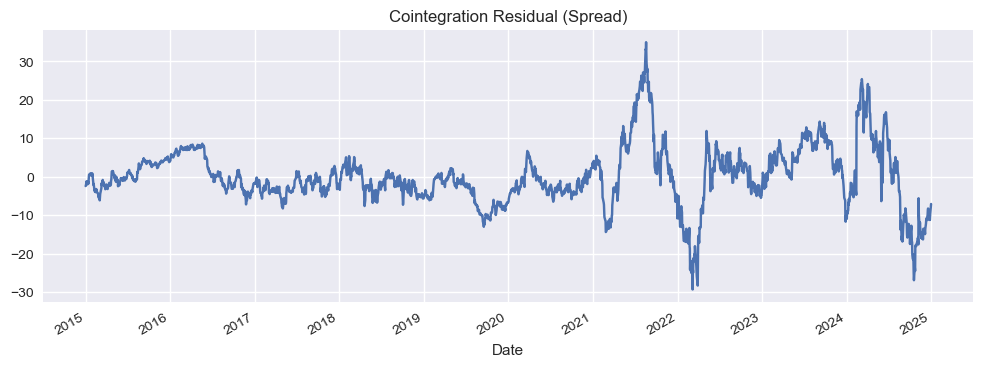

In [6]:
spread = A - beta * B - alpha
spread.plot(figsize=(12,4), title='Cointegration Residual (Spread)')
plt.show()

## 7. Stationarity test on spread (ADF test)

In [7]:
adf_stat, adf_pval, _, _, _, _ = adfuller(spread.dropna())
adf_stat, adf_pval

(np.float64(-4.6887000169581174), np.float64(8.836360198449836e-05))

## 8. Interpretation
- Significant cointegration p-value confirms long-run equilibrium.
- Stationary spread validates mean-reverting behavior.
- This pair is suitable for spread-based trading strategies.